# CIC UNSW-NB15 Augmented Dataset


In this note book I will convert this dataset to proper format to run my algorithm

## Inital setup

First We install a tool to download dataset faster

In [1]:
!apt-get install aria2 -y -qq

Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Selecting previously unselected package libaria2-0:amd64.
Preparing to unpack .../libaria2-0_1.36.0-1_amd64.deb ...
Unpacking libaria2-0:amd64 (1.36.0-1) ...
Selecting previously unselected package aria2.
Preparing to unpack .../aria2_1.36.0-1_amd64.deb ...
Unpacking aria2 (1.36.0-1) ...
Setting up libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Setting up libaria2-0:amd64 (1.36.0-1) ...
Setting up aria2 (1.36.0-1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a 

In [2]:
!aria2c -c -x 16 -s 16 -k 1M http://205.174.165.80/CICDataset/CIC-UNSW/CICFlowMeter_out.csv
!aria2c -c -x 16 -s 16 -k 1M http://205.174.165.80/CICDataset/CIC-UNSW/Data.csv
!aria2c -c -x 16 -s 16 -k 1M http://205.174.165.80/CICDataset/CIC-UNSW/Label.csv


10/29 16:31:06 [NOTICE] Downloading 1 item(s)
 *** Download Progress Summary as of Tue Oct 29 16:32:07 2024 *** 
=
[#9b0581 1.5GiB/1.7GiB(88%) CN:16 DL:26MiB ETA:7s]
FILE: /content/CICFlowMeter_out.csv
-


10/29 16:32:15 [NOTICE] Download complete: /content/CICFlowMeter_out.csv

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
9b0581|OK  |    26MiB/s|/content/CICFlowMeter_out.csv

Status Legend:
(OK):download completed.

10/29 16:32:15 [NOTICE] Downloading 1 item(s)

10/29 16:32:23 [NOTICE] Download complete: /content/Data.csv

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
ebfe07|OK  |    26MiB/s|/content/Data.csv

Status Legend:
(OK):download completed.

10/29 16:32:23 [NOTICE] Downloading 1 item(s)

10/29 16:32:24 [NOTICE] Download complete: /content/Label.csv

Download Results:
gid   |stat|avg speed  |path/URI
======+

In [3]:
!ls -ltrh

total 2.0G
drwxr-xr-x 1 root root 4.0K Oct 25 13:20 sample_data
-rw-r--r-- 1 root root 1.8G Oct 29 16:32 CICFlowMeter_out.csv
-rw-r--r-- 1 root root 188M Oct 29 16:32 Data.csv
-rw-r--r-- 1 root root 875K Oct 29 16:32 Label.csv


In [4]:
# prompt: zip csv file in this directory

import zipfile
import os

def zip_csv_files(directory):
  """Zips all CSV files in the specified directory."""
  zip_filename = os.path.join(directory, "csv_files.zip")
  with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(directory):
      for file in files:
        if file.endswith(".csv"):
          file_path = os.path.join(root, file)
          zipf.write(file_path, arcname=os.path.relpath(file_path, directory))

# Assuming the current directory is where you want to zip the CSV files
current_directory = os.getcwd()
zip_csv_files(current_directory)
print(f"CSV files zipped to: {os.path.join(current_directory, 'csv_files.zip')}")

CSV files zipped to: /content/csv_files.zip


## Analyze files

In [5]:
# prompt: with Data.csv , Label.csv and CICFlowMeter_out.csv files create separate dataframes to be able to work with in the next cells

import pandas as pd

# Load the CSV files into pandas DataFrames
df_data = pd.read_csv('Data.csv')
df_label = pd.read_csv('Label.csv')
df_cicflowmeter = pd.read_csv('CICFlowMeter_out.csv')

# Now you have three dataframes: df_data, df_label, and df_cicflowmeter
# You can work with them in the subsequent cells.


### df_data

In [6]:
len(df_data)

447915

In [7]:
df_data.head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,214392,9,21,388.0,24564.0,194.0,0.0,43.111111,85.545959,1460.0,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2376792,9,3,752.0,0.0,188.0,0.0,83.555556,99.084700,0.0,...,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,131350,10,3,7564.0,0.0,1460.0,0.0,756.400000,690.497277,0.0,...,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164796,6,3,770.0,0.0,385.0,0.0,128.333333,198.813145,0.0,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,163418,6,3,400.0,0.0,200.0,0.0,66.666667,103.279556,0.0,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# prompt: print all columns for this df_data

df_data.columns

Index(['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag C

In [9]:
df_data.head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,214392,9,21,388.0,24564.0,194.0,0.0,43.111111,85.545959,1460.0,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2376792,9,3,752.0,0.0,188.0,0.0,83.555556,99.084700,0.0,...,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,131350,10,3,7564.0,0.0,1460.0,0.0,756.400000,690.497277,0.0,...,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164796,6,3,770.0,0.0,385.0,0.0,128.333333,198.813145,0.0,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,163418,6,3,400.0,0.0,200.0,0.0,66.666667,103.279556,0.0,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### df_label

In [10]:
len(df_label)

447915

In [11]:
df_label.head()

,Label
0,4
1,7
2,4
3,3
4,6


In [12]:
df_label.columns

Index(['Label'], dtype='object')

### df_cicflowmeter

In [13]:
# prompt: print len of df_cicflowmeter with , 3 digit

print(f'{len(df_cicflowmeter):,}')

3,540,241


In [14]:
df_cicflowmeter.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,175.45.176.2-149.171.126.16-23357-80-6,175.45.176.2,23357,149.171.126.16,80,6,22/01/2015 07:50:15 AM,214392,9,21,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Exploits
1,175.45.176.0-149.171.126.16-13284-80-6,175.45.176.0,13284,149.171.126.16,80,6,22/01/2015 07:50:13 AM,2376792,9,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Reconnaissance
2,175.45.176.2-149.171.126.16-13792-5555-6,175.45.176.2,13792,149.171.126.16,5555,6,22/01/2015 07:50:16 AM,131350,10,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Exploits
3,175.45.176.0-149.171.126.15-39500-80-6,175.45.176.0,39500,149.171.126.15,80,6,22/01/2015 07:50:18 AM,164796,6,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
4,175.45.176.0-149.171.126.14-29309-3000-6,175.45.176.0,29309,149.171.126.14,3000,6,22/01/2015 07:50:19 AM,163418,6,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Generic


In [15]:
df_cicflowmeter.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

## Analyze Dataset

### Label

In [16]:
# prompt: Give me all distinct values of Label column in the file

import pandas as pd

try:
    distinct_labels = df_cicflowmeter['Label'].unique()
    print(distinct_labels)
except FileNotFoundError:
    print("Error: 'CICFlowMeter_out.csv' not found. Please ensure the file exists and the path is correct.")
except KeyError:
    print("Error: 'Label' column not found in the CSV file. Please check the column name.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

['Exploits' 'Reconnaissance' 'DoS' 'Generic' 'Benign' 'Shellcode'
 'Fuzzers' 'Worms' 'Backdoor' 'Analysis']


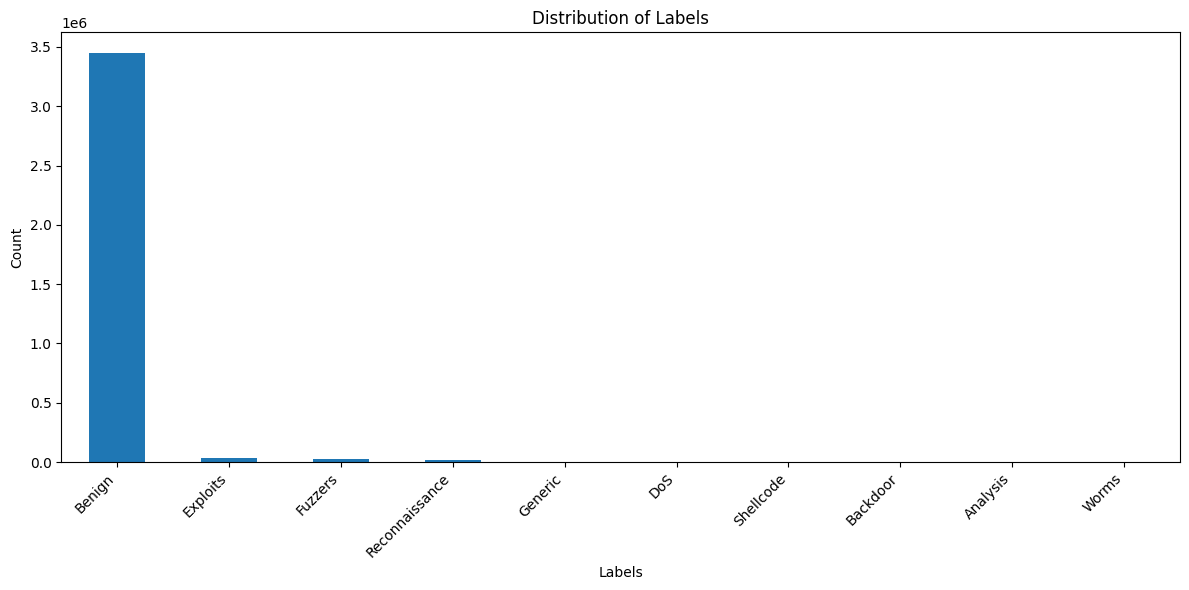

Label Counts:
Label
Benign            3450658
Exploits            30951
Fuzzers             29613
Reconnaissance      16735
Generic              4632
DoS                  4467
Shellcode            2102
Backdoor              452
Analysis              385
Worms                 246
Name: count, dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    label_counts = df_cicflowmeter['Label'].value_counts()

    # Bar chart for better visualization of label counts
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar')
    plt.title('Distribution of Labels')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    # Display a table for precise numerical comparison
    print("Label Counts:")
    print(label_counts)

except FileNotFoundError:
    print("Error: 'CICFlowMeter_out.csv' not found. Please ensure the file exists and the path is correct.")
except KeyError:
    print("Error: 'Label' column not found in the CSV file. Please check the column name.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [18]:
# prompt: Calculate percentage of every label value ratio due to all the data

try:
    label_counts = df_cicflowmeter['Label'].value_counts()
    total_count = len(df_cicflowmeter)
    percentages = (label_counts / total_count) * 100
    print("Label Percentages:")
    print(percentages)

except FileNotFoundError:
    print("Error: 'CICFlowMeter_out.csv' not found. Please ensure the file exists and the path is correct.")
except KeyError:
    print("Error: 'Label' column not found in the CSV file. Please check the column name.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Label Percentages:
Label
Benign            97.469579
Exploits           0.874263
Fuzzers            0.836468
Reconnaissance     0.472708
Generic            0.130839
DoS                0.126178
Shellcode          0.059374
Backdoor           0.012767
Analysis           0.010875
Worms              0.006949
Name: count, dtype: float64


## Generate new data

Now I want to generate a new form of dataset from this dataframes

My dataset will have start_node, end_node, timestamp

In [19]:
edge_anomaly_df = pd.DataFrame()
edge_anomaly_df['Src IP'] = df_cicflowmeter['Src IP']
edge_anomaly_df['Dst IP'] = df_cicflowmeter['Dst IP']
edge_anomaly_df['Timestamp'] = df_cicflowmeter['Timestamp']
edge_anomaly_df['Label'] = df_cicflowmeter['Label']

In [20]:
edge_anomaly_df.head()

,Src IP,Dst IP,Timestamp,Label
0,175.45.176.2,149.171.126.16,22/01/2015 07:50:15 AM,Exploits
1,175.45.176.0,149.171.126.16,22/01/2015 07:50:13 AM,Reconnaissance
2,175.45.176.2,149.171.126.16,22/01/2015 07:50:16 AM,Exploits
3,175.45.176.0,149.171.126.15,22/01/2015 07:50:18 AM,DoS
4,175.45.176.0,149.171.126.14,22/01/2015 07:50:19 AM,Generic


In [21]:
print(f"{len(edge_anomaly_df):,}")

3,540,241


In [22]:
# prompt: edge_anomaly_df convert Timestamp column to timeMillis

import pandas as pd

# Assuming 'edge_anomaly_df' is already defined and contains the 'Timestamp' column

# Convert the 'Timestamp' column to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(edge_anomaly_df['Timestamp']):
    edge_anomaly_df['Timestamp'] = pd.to_datetime(edge_anomaly_df['Timestamp'])

# Convert datetime objects to Unix timestamps (milliseconds)
edge_anomaly_df['Timestamp'] = edge_anomaly_df['Timestamp'].astype('int64') // 10**6

# Display the updated DataFrame
edge_anomaly_df.head()

<ipython-input-22-74c84860c7f0>:9: UserWarning: Parsing dates in %d/%m/%Y %I:%M:%S %p format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edge_anomaly_df['Timestamp'] = pd.to_datetime(edge_anomaly_df['Timestamp'])


,Src IP,Dst IP,Timestamp,Label
0,175.45.176.2,149.171.126.16,1421913015000,Exploits
1,175.45.176.0,149.171.126.16,1421913013000,Reconnaissance
2,175.45.176.2,149.171.126.16,1421913016000,Exploits
3,175.45.176.0,149.171.126.15,1421913018000,DoS
4,175.45.176.0,149.171.126.14,1421913019000,Generic


In [23]:
# prompt: Subtract Timestamp column from the min value of the whole column

# Assuming 'edge_anomaly_df' is already defined and contains the 'Timestamp' column
# and the 'Timestamp' column is already converted to Unix timestamps (milliseconds)

# Find the minimum timestamp value in the 'Timestamp' column
min_timestamp = edge_anomaly_df['Timestamp'].min()

# Subtract the minimum timestamp from each timestamp in the column
edge_anomaly_df['Timestamp_shifted'] = edge_anomaly_df['Timestamp'] - min_timestamp

# Display the updated DataFrame
edge_anomaly_df.head()

,Src IP,Dst IP,Timestamp,Label,Timestamp_shifted
0,175.45.176.2,149.171.126.16,1421913015000,Exploits,34000
1,175.45.176.0,149.171.126.16,1421913013000,Reconnaissance,32000
2,175.45.176.2,149.171.126.16,1421913016000,Exploits,35000
3,175.45.176.0,149.171.126.15,1421913018000,DoS,37000
4,175.45.176.0,149.171.126.14,1421913019000,Generic,38000


In [24]:
# prompt: remove Timestamp column

# Assuming 'edge_anomaly_df' is already defined and contains the 'Timestamp' column

# Drop the 'Timestamp' column
edge_anomaly_df = edge_anomaly_df.drop('Timestamp', axis=1)

# Display the updated DataFrame
edge_anomaly_df.head()

,Src IP,Dst IP,Label,Timestamp_shifted
0,175.45.176.2,149.171.126.16,Exploits,34000
1,175.45.176.0,149.171.126.16,Reconnaissance,32000
2,175.45.176.2,149.171.126.16,Exploits,35000
3,175.45.176.0,149.171.126.15,DoS,37000
4,175.45.176.0,149.171.126.14,Generic,38000


Now I want to convert ip address to int

In [25]:
import ipaddress

ip_address_str = '1.1.1.1'
ip_int = int(ipaddress.ip_address(ip_address_str))
hex_value = hex(ip_int)

print(f"The integer representation of {ip_address_str} is: {ip_int}")
print(f"The hex value of {ip_address_str} is: {hex_value}")

The integer representation of 1.1.1.1 is: 16843009
The hex value of 1.1.1.1 is: 0x1010101


In [26]:
# prompt: I want to convert Src Ip and Dst Ip to numbers raning to int 32 bit

import pandas as pd
import ipaddress

# Assuming 'edge_anomaly_df' is already defined and contains the 'Src IP' and 'Dst IP' columns

def ip_to_int(ip_str):
    try:
        return int(ipaddress.ip_address(ip_str))
    except ValueError:
        return None  # Or handle the invalid IP address as needed

# Apply the function to the 'Src IP' and 'Dst IP' columns
edge_anomaly_df['Src_IP_int'] = edge_anomaly_df['Src IP'].apply(ip_to_int)
edge_anomaly_df['Dst_IP_int'] = edge_anomaly_df['Dst IP'].apply(ip_to_int)

# Display the updated DataFrame
edge_anomaly_df.head()

,Src IP,Dst IP,Label,Timestamp_shifted,Src_IP_int,Dst_IP_int
0,175.45.176.2,149.171.126.16,Exploits,34000,2939006978,2511044112
1,175.45.176.0,149.171.126.16,Reconnaissance,32000,2939006976,2511044112
2,175.45.176.2,149.171.126.16,Exploits,35000,2939006978,2511044112
3,175.45.176.0,149.171.126.15,DoS,37000,2939006976,2511044111
4,175.45.176.0,149.171.126.14,Generic,38000,2939006976,2511044110


In [27]:
# prompt: Create new data frame with this order Src_IP_int, Dst_IP_int, Timestamp_shifted
# and remove _int and _shifted in column names

# Create a new DataFrame with the specified columns and renamed columns
edge_anomaly_df = edge_anomaly_df[['Src_IP_int', 'Dst_IP_int', 'Timestamp_shifted']].copy()
edge_anomaly_df = edge_anomaly_df.rename(columns={
    'Src_IP_int': 'Src_IP',
    'Dst_IP_int': 'Dst_IP',
    'Timestamp_shifted': 'Timestamp'
})

# Display the new DataFrame
edge_anomaly_df.head()

,Src_IP,Dst_IP,Timestamp
0,2939006978,2511044112,34000
1,2939006976,2511044112,32000
2,2939006978,2511044112,35000
3,2939006976,2511044111,37000
4,2939006976,2511044110,38000


In [40]:
# prompt: 0. my initial df is edge_anomaly_df
# 1. Create folders named cic-unsw-nb15-{anomaly category} (each anomaly category is label in dataframe not including Benign ones)
# 2. In every folder Create two files based on ordered dataframes including a label category and all Benign records . sort items based on timestamp asc
# 3. Data.csv file it has src ip and dst ip and timestamp without headers
# 4. Label.csv file it has one if the corresponding row in data not Benign (use conditions to convert dataframe)

import os
import pandas as pd

# Assuming edge_anomaly_df is already defined and populated

benign_df = edge_anomaly_df[edge_anomaly_df['Label'] == 'Benign'].copy()

# Create folders and files for each anomaly category
for category in edge_anomaly_df['Label'].unique():
  if category != 'Benign':
    print(f"Starting {category}")
    folder_name = f"cic-unsw-nb15-{category}"
    os.makedirs(folder_name, exist_ok=True)  # Create the folder if it doesn't exist

    # Create dataframes for current category and benign
    category_df = edge_anomaly_df[edge_anomaly_df['Label'] == category].copy()

    # Combine category and benign dataframes and sort
    combined_df = pd.concat([category_df, benign_df])
    combined_df = combined_df.sort_values('Timestamp')

    # Create Data.csv
    data_df = combined_df[['Src_IP', 'Dst_IP', 'Timestamp']]
    data_df.to_csv(os.path.join(folder_name, 'Data.csv'), index=False, header=False)

    # Create Label.csv
    label_df = pd.DataFrame(combined_df['Label'] != 'Benign').astype(int)
    label_df.to_csv(os.path.join(folder_name, 'Label.csv'), index=False, header=False)
    print(f"Complete {category}")

Starting Exploits
Complete Exploits
Starting Reconnaissance
Complete Reconnaissance
Starting DoS
Complete DoS
Starting Generic
Complete Generic
Starting Shellcode
Complete Shellcode
Starting Fuzzers
Complete Fuzzers
Starting Worms
Complete Worms
Starting Backdoor
Complete Backdoor
Starting Analysis
Complete Analysis


In [41]:
# prompt: All the folders starting with cic-unsw-nb15 create a zip file for every one of that  to be able to download it

import zipfile
import os

def zip_folder(folder_path):
  """Zips the specified folder and its contents."""
  zip_filename = folder_path + ".zip"
  with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        zipf.write(file_path, arcname=os.path.relpath(file_path, folder_path))
  print(f"Folder '{folder_path}' zipped to '{zip_filename}'")

# Iterate through folders and create zip files
for folder_name in os.listdir():
    if folder_name.startswith("cic-unsw-nb15"):
        folder_path = os.path.abspath(folder_name)  # Get absolute path
        if os.path.isdir(folder_path):  # Check if it's a directory
            zip_folder(folder_path)

Folder '/content/cic-unsw-nb15-Generic' zipped to '/content/cic-unsw-nb15-Generic.zip'
Folder '/content/cic-unsw-nb15-Shellcode' zipped to '/content/cic-unsw-nb15-Shellcode.zip'
Folder '/content/cic-unsw-nb15-Reconnaissance' zipped to '/content/cic-unsw-nb15-Reconnaissance.zip'
Folder '/content/cic-unsw-nb15-Fuzzers' zipped to '/content/cic-unsw-nb15-Fuzzers.zip'
Folder '/content/cic-unsw-nb15-Exploits' zipped to '/content/cic-unsw-nb15-Exploits.zip'
Folder '/content/cic-unsw-nb15-Analysis' zipped to '/content/cic-unsw-nb15-Analysis.zip'
Folder '/content/cic-unsw-nb15-Backdoor' zipped to '/content/cic-unsw-nb15-Backdoor.zip'
Folder '/content/cic-unsw-nb15-Worms' zipped to '/content/cic-unsw-nb15-Worms.zip'
Folder '/content/cic-unsw-nb15-DoS' zipped to '/content/cic-unsw-nb15-DoS.zip'
